Informatik BMLD ZHAW, HS 2022

# Leistungsnachweis Pandas

## Aufgabenstellung
In diesem Leistungsnachweises sollen die bisher erworbenen Kenntnisse von Python, und insbesondere von Pandas, angewendet werden. Aufgabe ist es, entsprechend der vier Schritte der Datenanalyse eine eigene Datenanalyse anhand von selbst gewählten Daten zu erstellen. Folgende Anforderungen werden an die 4 Schritte gestellt:

1. Daten beschaffen und laden:
    - Wählen eine Datenquelle und einen Datensatz (nicht das Beispiel Lebenserwartung aus der Vorlesung)
    - Für ein «erfüllt» reicht ein Datensatz aus «Our World in Data»
    - Zusatzpunkte gibt es, wenn weitere Argumente für den read-Befehl benutzt werden müssen.
2. Datenvorbereitung
    - Hier sollen die Daten in das Long Format gebracht werden
    - Sind die Daten bereits im Long Format, muss in diesem Schritt nichts gemacht werden
    - Hier gibt es Zusatzpunkte, wenn die melt-Methode verwendet wird oder wenn mehrere Datensetzen vereint werden.
3. Daten-Exploration
    - Mach eine statistische Analyse jeder Spalte (im Long Format)
4. Daten-Analyse. Wie beim Excel-Leistungsnachweise:
    - Überlege eine für die Daten geeignete Forschungsfrage
    - Beantwortet sie mit einer sinnvollen Visualisierung der Daten
    - Beschreibe in wenigen Sätzen (als Richtlinie: max. 10) das Vorgehen und die Resultate der Visualisierung.
    - Zusatzpunkte: Verwendung von Pivot, mehrere Visualisierungen, Recherche zur Plausibilisierung der Resultate.


## Rahmenbedingungen
- Ihr arbeitet in Gruppen von maximal 3 Personen.
- In der übungsstunde vom 1. Dezember könnt ihr Fragen stellen und bekommt Hilfe durch Adrian.
- Abgabezeitpunkt ist der 3. Dezember 2022 um 20h.
- Abzugeben ist eine Jupyter-Datei auf Moodle. Es reicht, wenn eine Person die Datei einreicht. Dateiname: Titel_Nachname1_Nachname2_Nachname3.ipynb
- Der Nachteilsausweis zählt 10% der Gesamtnote

---


Forschungsfrage:

# Ist Homeoffice eine effektive Art um den Energieverbrauch zu reduzieren?
## Abgrenzungen
- Nur Schweiz (Auch im Wissen, dass Bundesamt für Statistik nicht die beste Quelle ist)
- Um den Aufwand zu reduzieren wird nur der Individualverkehr betrachtet

## ToDo:
- Bessere Forschungsfrage? Ist reduzierte Mobilität...

## Grundsätzliches Vorgehen
1. Beschaffung von Daten die den Jahresverbrach an Energie zeigen (Treibstoffe, Elektrizität, Holz, etc.)
2. Beschaffung von Daten die Auskunft über die Mobilität geben (ÖV, Auto, etc.), am besten nach Alter
3. Korrelation finden
    - 2020 war das erste Corona-Jahr, in welchem die Mobilität durch Lockdowns stark eingeschränk war. Dadurch wurde auch auf alternative Arbeitsformen (Homeoffice) ausgewichen
    - Der Treibstoffverbrauch müsste zurückgegangen sein
    - Wie verhält sich der sonstige Energieverbrauch (Heizen, Strom)? Geht der auch zurück oder nimmt der Verbrauch zu?
4. Falls möglich Energieeinsparung berechen:
    - Eingesparter Energieverbracuh auf die pendelnde Bevölkerung umrechen
5. Fazit

## 1 Daten beschaffen und laden

Funktionen: 
- [pandas](https://pandas.pydata.org/docs/user_guide/index.html)
- [pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) 
- [pandas.DataFrame.rename](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt # use when ploting data

### 1.1 Endenergieverbrauch nach Energieträgern
Quelle: [Endenergieverbrauch nach Energieträgern](https://www.bfs.admin.ch/bfs/de/home/statistiken/energie/verbrauch.assetdetail.23104756.html)

Vorgehen:
1. Download als xlxs und speichern als Endenergieverbrauch nach `Endenergieverbrauch nach Energieträgern_raw.xlsx`
2. Die Daten in Excel aufgearbeiten und bereinigen
    - abspeichern als CSV
    - einfügen eines einzeiligen Headers
    - entfernen aller unnötigen Leerzeichen
    - entfernen aller Tausenderzeichen 
3. Die bereinigte Datei unter `Endenergieverbrauch nach Energieträgern_clean.csv` speichern (nur das Arbeitsblatt 'in Terajoules')

In [2]:
df_energy = pd.read_csv('Endenergieverbrauch nach Energieträgern_clean.csv', engine='python', header=9, skipfooter=11, na_values='...')
df_energy = df_energy.rename(columns={"Total": "Total (TJ)",
                                     "Erdölbrennstoffe": "Erdölbrennstoffe (TJ)",
                                     "Treibstoffe": "Treibstoffe (TJ)",
                                     "Elektrizität": "Elektrizität (TJ)",
                                     "Gas": "Gas (TJ)",
                                     "Kohle und Koks": "Kohle & Koks (TJ)",
                                     "Holz und Holzkohle": "Holz & Holzkohle (TJ)",
                                     "Fernwärme": "Fernwärme (TJ)",
                                     "Abfälle": "Abfälle (TJ)",
                                     "Übrige erneuerbare Energien": "ern. Energie (TJ)"}, errors="raise")
df_energy

,Jahr,Total (TJ),Erdölbrennstoffe (TJ),Treibstoffe (TJ),Elektrizität (TJ),Gas (TJ),Kohle & Koks (TJ),Holz & Holzkohle (TJ),Fernwärme (TJ),Abfälle (TJ),ern. Energie (TJ)
0,1910,99990,240,500,3530,2220,76310,17190,NaN,NaN,NaN
1,1911,109490,340,620,4330,2350,84660,17190,NaN,NaN,NaN
2,1912,111190,350,660,5040,2570,85380,17190,NaN,NaN,NaN
3,1913,115670,340,690,5450,2550,89450,17190,NaN,NaN,NaN
4,1914,112640,150,520,5670,2570,86900,16830,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
107,2017,852260,127930,290100,210540,118910,4610,42720,19790.0,11220.0,26440.0
108,2018,833250,115630,294300,207530,112310,4290,40450,19360.0,11070.0,28310.0
109,2019,836230,112310,294360,205910,115210,3810,41080,21530.0,11670.0,30350.0
110,2020,747900,101110,226720,200570,112900,3660,39860,21050.0,11610.0,30420.0


### 1.2 Erwerbstätige Pendler nach Hauptverkehrsmitteln
Quelle: [Erwerbstätige Pendler/innen (Arbeitspendler/innen) nach Hauptverkehrsmitteln](https://www.bfs.admin.ch/bfs/de/home/aktuell/neue-veroeffentlichungen.assetdetail.20984171.html)

Vorgehen:
1. Download als xlxs und speichern als Endenergieverbrauch nach `Erwerbstätige Pendler nach Hauptverkehrsmitteln_raw.xlsx`
2. Die Daten in Excel aufgearbeiten und bereinigt 
    - abspeichern als CSV
    - einfügen eines einzeiligen Headers
    - entfernen aller unnötigen Leerzeichen
    - entfernen aller `Anteil in %` und `VI ±, in %` (nicht relevante Spalten)
    - entfernen aller Tausenderzeichen
3. Die bereinigte Datei unter `Erwerbstätige Pendler nach Hauptverkehrsmitteln_clean.csv` gespeicheren

In [3]:
df_transport = pd.read_csv('Erwerbstätige Pendler nach Hauptverkehrsmitteln_clean.csv', engine='python', header=6, skipfooter=23, na_values='...')
df_transport

,Kategorie,1990,2000,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Total Pendler/innen1 mit bekanntem Hauptverkeh...,2925399.0,2998642.0,3599516.0,3640557.0,3651552.0,3843860.0,3901350.0,3921729.0,3925260.0,3976201.0,3574399.0,3603723.0,3452311
1,zu Fuss,307879.0,264954.0,358838.0,346896.0,337243.0,357585.0,357898.0,353955.0,345923.0,340003.0,321513.0,310575.0,331633
2,Velo,212781.0,203478.0,216031.0,232744.0,222485.0,248611.0,252703.0,258355.0,260601.0,271108.0,264245.0,287548.0,245989
3,elektrisches Velo (E-Bike),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52531
4,motorisierte Zweiräder (ohne E-Bike),117276.0,88950.0,65770.0,67008.0,63807.0,66471.0,70771.0,70775.0,63607.0,62778.0,56052.0,57915.0,54043
5,Auto,1467084.0,1661987.0,1884456.0,1918019.0,1929851.0,2026781.0,2046631.0,2056790.0,2058074.0,2074948.0,1841837.0,1833292.0,1811290
6,öffentlicher Strassenverkehr,493473.0,416192.0,495821.0,491274.0,500353.0,515745.0,528338.0,525677.0,534235.0,543681.0,487383.0,489619.0,422589
7,Bahn,326906.0,363081.0,570702.0,577183.0,590518.0,619213.0,636273.0,647728.0,654819.0,673410.0,593719.0,613841.0,519769
8,übrige Verkehrsmittel,0.0,0.0,7898.0,7433.0,7295.0,9453.0,8735.0,8449.0,8000.0,10273.0,9650.0,10933.0,14467
9,Pendler/innen1 mit unbekanntem Hauptverkehrsmi...,20023.0,59006.0,42539.0,26306.0,35003.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## 2 Datenvorbereitung
Die Daten stehen im `wide` Format zur verfügung und müssen mit `melt` ins `long` Format überführt werden.

Funktionen:

- [pandas.melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html)
- [pandas.concat](https://pandas.pydata.org/docs/reference/api/pandas.concat.html#pandas.concat)
- [pandas.DataFrame.sort_values](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)
- [pandas.DataFrame.astype](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)

Parameter setzten, damit:
- alle NaN Werte entfernt werden
- `variable` zu `Kategorie` wird
- `value` zu `Wert` wird

In [21]:
# melt wide format to long, sort and check outcome
df_energy_long = df_energy.melt(id_vars=["Jahr"],var_name="Kategorie",value_name="Wert").dropna()
df_energy_long = df_energy_long.astype({"Jahr": "int32"}) # force year to be an integer
df_energy_long = df_energy_long.sort_values(by=["Jahr", "Kategorie"]) # both categories asc (default)
df_energy_long = df_energy_long.reset_index().drop(columns="index") # reset index and drop old index
df_energy_long.head(15) # check if it works

,Jahr,Kategorie,Wert
0,1910,Elektrizität (TJ),3530.0
1,1910,Erdölbrennstoffe (TJ),240.0
2,1910,Gas (TJ),2220.0
3,1910,Holz & Holzkohle (TJ),17190.0
4,1910,Kohle & Koks (TJ),76310.0
5,1910,Total (TJ),99990.0
6,1910,Treibstoffe (TJ),500.0
7,1911,Elektrizität (TJ),4330.0
8,1911,Erdölbrennstoffe (TJ),340.0
9,1911,Gas (TJ),2350.0


In [20]:
# melt wide format to long, sort and check outcome
df_transport_long = df_transport.melt(id_vars=["Kategorie"],var_name="Jahr",value_name="Wert").dropna()
df_transport_long = df_transport_long[["Jahr", "Kategorie", "Wert"]] # reorder columns
df_transport_long = df_transport_long.astype({"Jahr": "int32"}) # force year to be an integer
df_transport_long = df_transport_long.sort_values(by=["Jahr", "Kategorie"]) # both categories asc (default)
df_transport_long = df_transport_long.reset_index().drop(columns="index") # reset index and drop old index
df_transport_long.head(19) # check if it works

,Jahr,Kategorie,Wert
0,1990,Auto,1467084.0
1,1990,Bahn,326906.0
2,1990,Pendler/innen1 mit unbekanntem Hauptverkehrsmi...,20023.0
3,1990,Total Pendler/innen1 mit bekanntem Hauptverkeh...,2925399.0
4,1990,Velo,212781.0
5,1990,motorisierte Zweiräder (ohne E-Bike),117276.0
6,1990,zu Fuss,307879.0
7,1990,öffentlicher Strassenverkehr,493473.0
8,1990,übrige Verkehrsmittel,0.0
9,2000,Auto,1661987.0


In [19]:
df_full = pd.concat([df_energy_long, df_transport_long])
df_full = df_full.sort_values(by=["Jahr", "Kategorie"])
df_full = df_full.reset_index().drop(columns="index") # reset index and drop old index
df_full

,Jahr,Kategorie,Wert
0,1910,Elektrizität (TJ),3530.0
1,1910,Erdölbrennstoffe (TJ),240.0
2,1910,Gas (TJ),2220.0
3,1910,Holz & Holzkohle (TJ),17190.0
4,1910,Kohle & Koks (TJ),76310.0
...,...,...,...
1017,2021,Holz & Holzkohle (TJ),46390.0
1018,2021,Kohle & Koks (TJ),3700.0
1019,2021,Total (TJ),794720.0
1020,2021,Treibstoffe (TJ),233210.0


## 3. Daten-Exploration

Die vorhandenen Daten-Frames untersuchen.

Aus welchen Jahren haben wir Daten?

In [7]:
print("Energierverbrauch aus den Jahren", df_energy_long["Jahr"].min(), "bis", df_energy_long["Jahr"].max())
print("Transportdaten aus den Jahren", df_transport_long["Jahr"].min(), "bis", df_transport_long["Jahr"].max())

Energierverbrauch aus den Jahren 1910 bis 2021
Transportdaten aus den Jahren 1990 bis 2020


Was für Kategorien stehen uns bezüglich Energieverbrauch zur verfügung?

In [8]:
print(df_energy_long["Kategorie"].unique())

['Elektrizität (TJ)' 'Erdölbrennstoffe (TJ)' 'Gas (TJ)'
 'Holz & Holzkohle (TJ)' 'Kohle & Koks (TJ)' 'Total (TJ)'
 'Treibstoffe (TJ)' 'Abfälle (TJ)' 'Fernwärme (TJ)' 'ern. Energie (TJ)']


Was für Kategorien stehen uns bezüglich Transport zur verfügung?

In [9]:
print(df_transport_long["Kategorie"].unique())

['Auto' 'Bahn' 'Pendler/innen1 mit unbekanntem Hauptverkehrsmittel 2, 6'
 'Total Pendler/innen1 mit bekanntem Hauptverkehrsmittel' 'Velo'
 'motorisierte Zweiräder (ohne E-Bike)' 'zu Fuss'
 'öffentlicher Strassenverkehr' 'übrige Verkehrsmittel'
 'elektrisches Velo (E-Bike)']


***Gemäss der Exploration liefern uns die Datensätze genügend Daten um unsere Analyse durchzuführen***

- Wir haben aus beiden Quellen Daten aus den relevanten Jahren 2020 (Corona)
- Es stehen uns für einen Vergleich auch Daten ab 1990 zur Verfügung
- Die Daten lieferen mindestens die relevanten Kategorien `Treibstoffe (TJ)`, `Elektrizität (TJ)`, `Auto`, `öffentlicher Strassenverkehr`

## 4. Daten-Analyse

Funktionen:
- [pandas.DataFrame.pivot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html)

### 4.1 Energieverbrauch

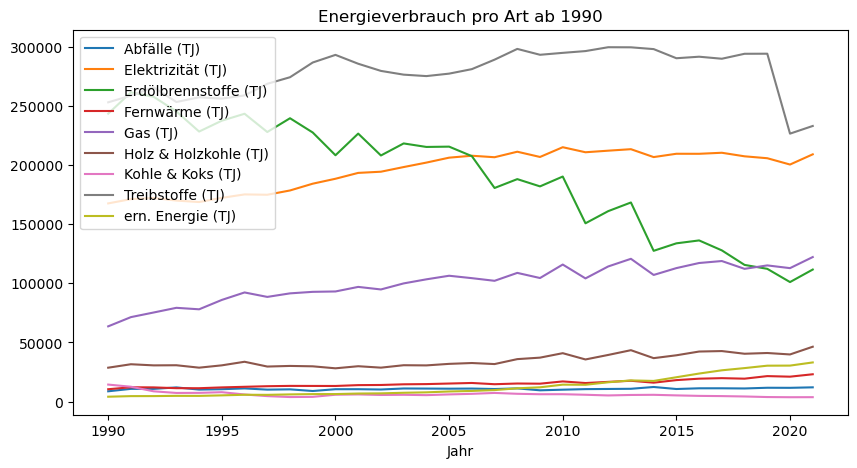

In [54]:
filter_historic = df_full["Jahr"] >= 1990
filter_energy_fuel = df_full["Kategorie"] == "Treibstoffe (TJ)"
filter_energy_other = ((df_full["Kategorie"] == "Elektrizität (TJ)")|
                       (df_full["Kategorie"] == "Erdölbrennstoffe (TJ)")|
                       (df_full["Kategorie"] == "Gas (TJ)")|
                       (df_full["Kategorie"] == "Holz & Holzkohle (TJ)")|
                       (df_full["Kategorie"] == "Kohle & Koks (TJ)")|
                       (df_full["Kategorie"] == "Abfälle (TJ)")|
                       (df_full["Kategorie"] == "Fernwärme (TJ)")|
                       (df_full["Kategorie"] == "ern. Energie (TJ)"))
df_energy_wide = df_full[(filter_historic & (filter_energy_fuel | filter_energy_other))].pivot(index="Jahr", columns="Kategorie", values="Wert")
df_energy_wide.plot(kind="line",figsize=[10,5], title= "Energieverbrauch pro Kategorie ab 1990")
plt.legend(loc='upper left')
plt.show()

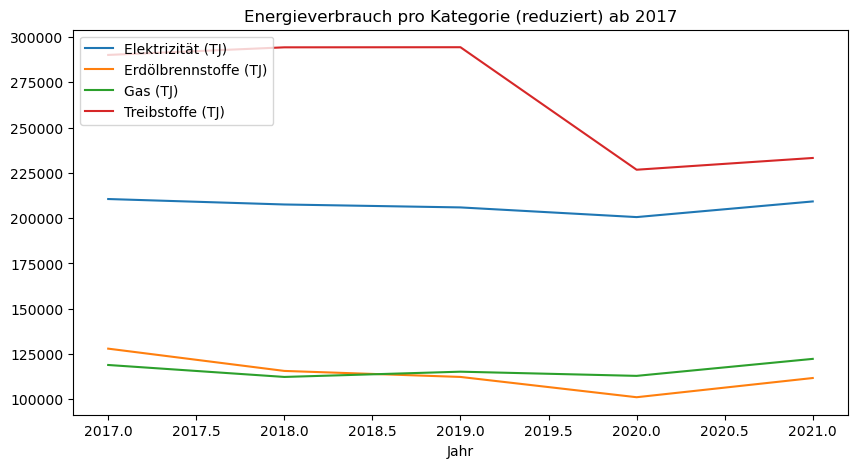

In [60]:
filter_year = df_full["Jahr"] >= 2017
filter_energy_other = ((df_full["Kategorie"] == "Elektrizität (TJ)")|
                       (df_full["Kategorie"] == "Erdölbrennstoffe (TJ)")|
                       (df_full["Kategorie"] == "Gas (TJ)"))
df_energy_wide = df_full[(filter_year & (filter_energy_fuel | filter_energy_other))].pivot(index="Jahr", columns="Kategorie", values="Wert")
df_energy_wide.plot(kind="line",figsize=[10,5], title= "Energieverbrauch pro Kategorie (reduziert) ab 2017")
plt.legend(loc='upper left')
plt.show()

Feststellung:
- Im Corona-Jahr nahm der Treibstoffverbrauch deutlich ab
- Die die restlichen Energieträger verhielten sich ihren Tendenzen entsprechend konstant
- Neben Elektrizität, Erdölbrennstoffe und Gas spielen die restlichen Energieträger eine untergeordnete Rolle
- Da Elektrizität, Erdölbrennstoffe und Gas im Corona-Jahr nicht zunahmen, verbrauchten die Menschen zuhause nicht mehr Strom und es wurde auch nicht mehr geheizt

### 4.2 Transport

Anmerkung:
- Wir nutzen nur die Kategorien, welche Treibstoff verbrauchen

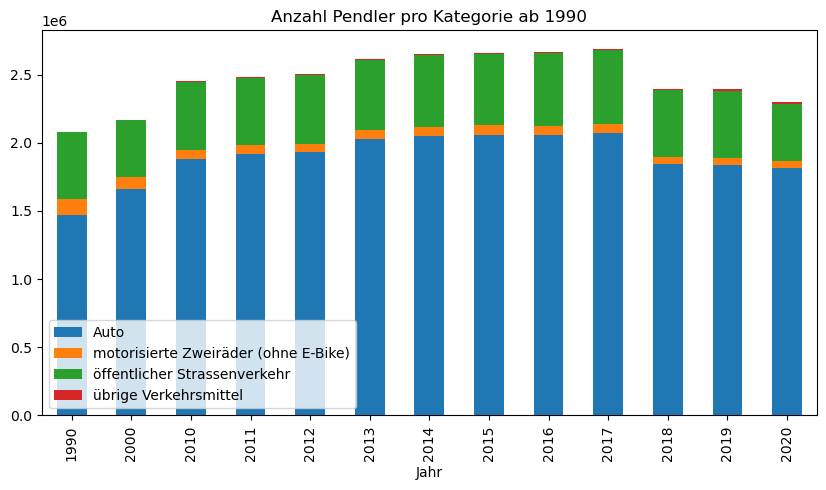

In [61]:
filter_transport = ((df_full["Kategorie"] == "Auto" )|
                    (df_full["Kategorie"] == "öffentlicher Strassenverkehr")|
                    (df_full["Kategorie"] == "motorisierte Zweiräder (ohne E-Bike)")|
                    (df_full["Kategorie"] == "übrige Verkehrsmittel"))
df_transport_wide = df_full[(filter_historic & filter_transport)].pivot(index="Jahr", columns="Kategorie", values="Wert")
df_transport_wide.plot(kind="bar",figsize=[10,5], title= "Anzahl Pendler pro Kategorie ab 1990", stacked=True)
plt.legend(loc='lower left')
plt.show()

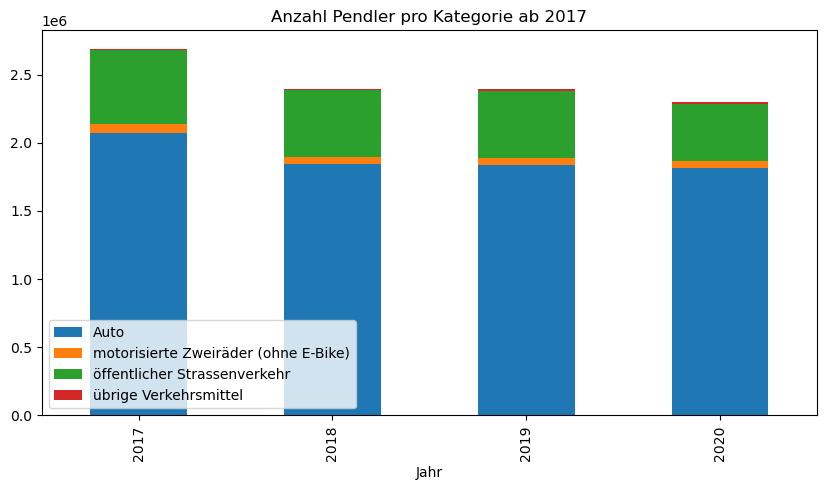

In [59]:
filter_transport = ((df_full["Kategorie"] == "Auto" )|
                    (df_full["Kategorie"] == "öffentlicher Strassenverkehr")|
                    (df_full["Kategorie"] == "motorisierte Zweiräder (ohne E-Bike)")|
                    (df_full["Kategorie"] == "übrige Verkehrsmittel"))
df_transport_wide = df_full[(filter_year & filter_transport)].pivot(index="Jahr", columns="Kategorie", values="Wert")
df_transport_wide.plot(kind="bar",figsize=[10,5], title= "Anzahl Pendler pro Kategorie ab 2017", stacked=True)
plt.legend(loc='lower left')
plt.show()

### 4.3 Berechnungen

In [14]:
filter_corona = ((df_full["Jahr"] == 2019) | (df_full["Jahr"] == 2020))
filter_energy_fuel = df_full["Kategorie"] == "Treibstoffe (TJ)"
df_fuel_diff = df_full[(filter_corona & filter_energy_fuel)]
df_fuel_diff = df_fuel_diff.reset_index().drop(columns="index") # reset index and drop old index
df_fuel_diff

,Jahr,Kategorie,Wert
0,2019,Treibstoffe (TJ),294360.0
1,2020,Treibstoffe (TJ),226720.0


In [15]:
value_2019 = df_fuel_diff.loc[0, "Wert"]
value_2020 = df_fuel_diff.loc[1, "Wert"]
difference = value_2019 - value_2020

print("Verbrauch von Treibstoff im Jahr 2019: ", value_2019, "TJ")
print("Verbrauch von Treibstoff im Jahr 2020: ", value_2020, "TJ")
print("Differenz im Verbrauch: ", difference , "TJ")

Verbrauch von Treibstoff im Jahr 2019:  294360.0 TJ
Verbrauch von Treibstoff im Jahr 2020:  226720.0 TJ
Differenz im Verbrauch:  67640.0 TJ


Berechnung der Anzahl Personen die mit Treibstoffverbrauchenden Verkehrsmittel pendeln (Jahr 2020)

In [16]:
filter_2020 = df_full["Jahr"] == 2020
filter_transport = ((df_full["Kategorie"] == "Auto" )|
                    (df_full["Kategorie"] == "öffentlicher Strassenverkehr")|
                    (df_full["Kategorie"] == "motorisierte Zweiräder (ohne E-Bike)"))
df_transport_2020 = df_full[(filter_2020 & filter_transport)]
df_transport_2020 = df_transport_2020.reset_index().drop(columns="index") # reset index and drop old index
df_transport_2020

,Jahr,Kategorie,Wert
0,2020,Auto,1811290.0
1,2020,motorisierte Zweiräder (ohne E-Bike),54043.0
2,2020,öffentlicher Strassenverkehr,422589.0


In [22]:
car = df_transport_2020.loc[0, "Wert"]
motorcycle = df_transport_2020.loc[1, "Wert"]
public_transport = df_transport_2020.loc[2, "Wert"]
total_pers = car + motorcycle + public_transport

print("Anzahl Pendler im Auto: ", car)
print("Anzahl Pendler im ÖV: ", public_transport)
print("Anzahl Pendler mit motorisierten Zweirädern: ", motorcycle)
print("Total: ", total_pers)

Anzahl Pendler im Auto:  1811290.0
Anzahl Pendler im ÖV:  422589.0
Anzahl Pendler mit motorisierten Zweirädern:  54043.0
Total:  2287922.0


In [44]:
print("Gesparter Treibstoffverbrauch: ", difference , "TJ")
print("Von Anzahl Verbrauchern: ", int(total_pers)) # shown number without decimal
print()

consumption_per_pers_TJ = difference / total_pers
print("Gesparter Verbrauch: ", round(consumption_per_pers,6), "TJ/Jahr", "-->", round(consumption_per_pers,6), "TWs/Jahr")
# J = Ws

consumption_per_pers_GWs = consumption_per_pers_TJ * 1000
print("Gesparter Verbrauch: ", round(consumption_per_pers_GWs,3), "GWs/Jahr")
print()

consumption_per_pers_MWh = consumption_per_pers_GWs / 3600 * 1000
print("Gesparter Verbrauch: ", round(consumption_per_pers_MWh,3), "MWh/Jahr")
print()

consumption_W = (consumption_per_pers_MWh * 10**6) / (365 * 24)
print("Gesparter Verbrauch in Watt: ", round(consumption_W,3), "W")

Gesparter Treibstoffverbrauch:  67640.0 TJ
Von Anzahl Verbrauchern:  2287922

Gesparter Verbrauch:  0.029564 TJ/Jahr --> 0.029564 TWs/Jahr
Gesparter Verbrauch:  29.564 GWs/Jahr

Gesparter Verbrauch:  8.212 MWh/Jahr

Gesparter Verbrauch in Watt:  937.467 W


### 4.4 Vorgehen

Wir haben die vobereiteten Daten mit hilfe der pivot-Funktion in eine wide-Tabelle überführt, damit wir mehrere Spalten zusammen in einem Plot darstellen können. Um Tendenzen erkennen zu können, haben wir zwei verschiedene Zeiträume verwendet. Einmal ab dem Jahr 1990 ("historisch") und einmal ab 2017 ("ums Corona-Jahr 2020"). Wir haben für die Energieträger ein Linien-Diagramm verwendet, da die Kategorien unabhängig voneinander sind. Bei Anzahl Personen ist hingegen ein Säulen-Diagramm (stacked) die sinnvollere Wahl, da das Total der Kategorien relevant ist.

### 4.5 Beschreibung und Plausibilisierung der Resultate

Die Forschungsfrage kann unserer Meinung nach mit einem Ja beantwortet werden. Würden wir die Mobilität wie in dem Corona-Jahr 2020 reduzieren und aus dem Homeoffice arbeiten, könnte enorm viel Leistung gespart werden. ~900W gespart pro Person die nicht pendelt entspricht zum Beispiel einer Mikrowelle die das ganze Jahr über mit 900W essen erwärmt. Mit der gesparten Energie (pro Person) im Jahr 2020 könnte ein Tesla Model 3 ~101 mal vollständig aufgeladen werden<sup>1)</sup>.

<sup>1)</sup> Model 3 81kWh Batterie. 8.212 MWh / 81kWh = 101